# Data Project - Stock Market Analysis¶

in this project, i looked over data from stock markets, especially some Technology stocks. I used pandas to get stock information, visualize different aspects of it, and finally we will looked at a few ways of analyzing the risk of a stock, based on its previous performance history. I also used Monte Carlo Method for predicting the future stock prices.

The questions i looked over are:

1.) What was the change in price of the stock over time? 
2.) What was the daily return of the stock on average? 
3.) What was the moving average of the various stocks? 
4.) What was the correlation between different stocks' closing prices?
5.) How much value do I put at risk by investing in a particular stock? 
6.) How can we attempt to predict future stock behavior?

# Basic Analysis of Stock Info

In [1]:
import numpy as np
import pandas as pd
from pandas import DataFrame
from numpy.random import randn
from scipy import stats
#for visualization
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline
#to import data from Yahoo
import fix_yahoo_finance as fyf
import pandas_datareader as pdr
from datetime import datetime
from __future__ import division

In [2]:
#list of Company i'll be working with
tech_list=["AAPL","GOOG","MSFT","AMZN"]
end_date=datetime.now()
start_date=datetime(end_date.year-1,end_date.month,end_date.day)

In [3]:
AAPL=pdr.get_data_yahoo('AAPL',start_date)

In [4]:
GOOG=pdr.get_data_yahoo('GOOG',start_date)

In [5]:
MSFT=pdr.get_data_yahoo('MSFT',start_date)

In [6]:
AMZN=pdr.get_data_yahoo('AMZN',start_date)

Looking at Apple Stocks we see

In [8]:
AAPL.describe()

,High,Low,Open,Close,Volume,Adj Close
count,253.000000,253.000000,253.000000,253.000000,2.530000e+02,253.000000
mean,132.828380,130.015534,131.459052,131.445059,9.700098e+07,131.073855
std,11.164236,11.255926,11.232195,11.250508,3.266119e+07,11.418580
min,110.680000,107.320000,109.110001,108.769997,4.639770e+07,108.074883
25%,124.000000,121.000000,122.599998,122.540001,7.499350e+07,122.146103
50%,131.050003,128.490005,129.410004,130.149994,9.095670e+07,129.944260
75%,144.059998,140.070007,141.899994,142.020004,1.119326e+08,141.807541
max,157.259995,154.389999,156.979996,156.690002,2.623305e+08,156.690002


So with Apple Stocks er get column values of its highest and lowest mean, variance and deviation for various percantiles as well.
We can get the similar attributes for Microsoft, Google, and Amazon Stock

Historical View of all these stocks in the past 1 year is:

Text(0.5, 0, 'Closing price')

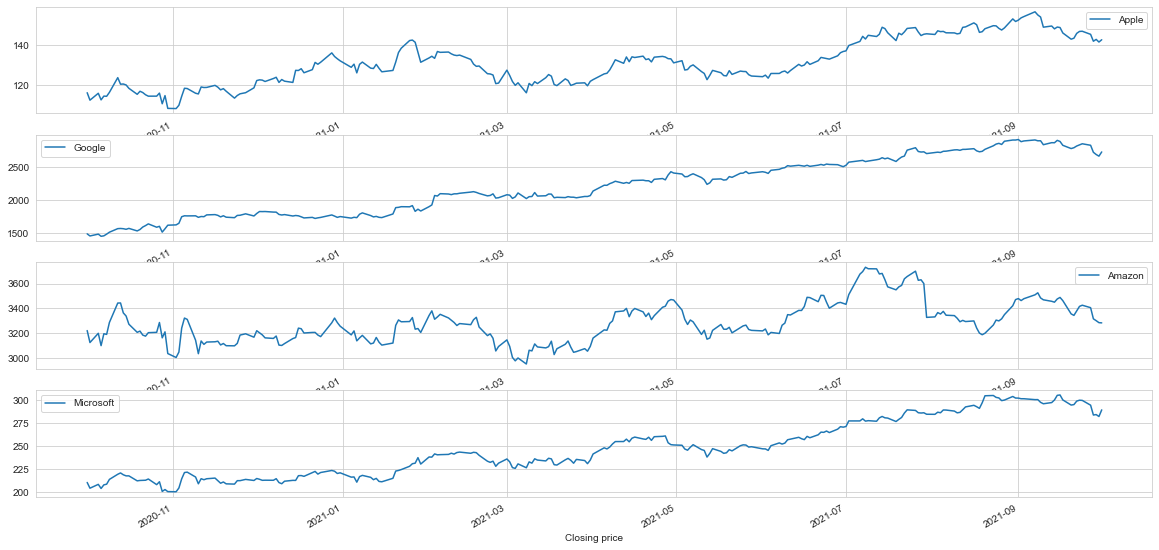

In [9]:
#historical view of All stock prices
f,(axis1,axis2,axis3,axis4)=plt.subplots(4,1)
AAPL['Adj Close'].plot(legend=True, figsize=(20,10),ax=axis1,label="Apple")
GOOG['Adj Close'].plot(legend=True, figsize=(20,10),ax=axis2,label="Google")
AMZN['Adj Close'].plot(legend=True, figsize=(20,10),ax=axis3,label="Amazon")
MSFT['Adj Close'].plot(legend=True, figsize=(20,10),ax=axis4,label="Microsoft")
plt.xlabel('Closing price')

Here, we can see, in the span of 1 year the all the stock prices have fluctuated, though none of the tech stocks have suffered a terrible crash.

So change in price of the stock was pretty stable for all stocks.



Looking at Volume of stocks traded each day:

Text(0.5, 0, 'Volume')

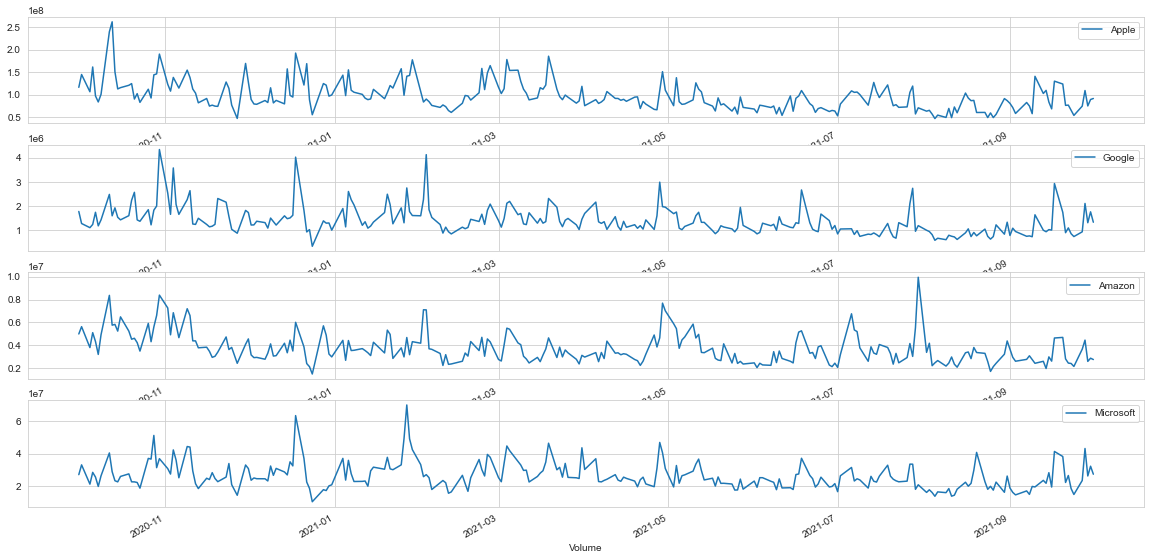

In [11]:
#historical view of All stock traded each day over the year
f,(axis1,axis2,axis3,axis4)=plt.subplots(4,1)
AAPL['Volume'].plot(legend=True, figsize=(20,10),ax=axis1,label="Apple")
GOOG['Volume'].plot(legend=True, figsize=(20,10),ax=axis2,label="Google")
AMZN['Volume'].plot(legend=True, figsize=(20,10),ax=axis3,label="Amazon")
MSFT['Volume'].plot(legend=True, figsize=(20,10),ax=axis4,label="Microsoft")
plt.xlabel('Volume')

From the graph, its safe to say, Apple Stock has been sold in most volumes on a daily average and Google being the least sold stock.


Rolling Average for the above stocks:

For ALL the stocks:

In [12]:
#moving averages
ma_day=[10, 20, 50]
for ma in ma_day:
    c=ma
    column_name='MA for %s days' %str(ma)
    AAPL[column_name]=AAPL['Adj Close'].rolling(c).mean()
    GOOG[column_name]=GOOG['Adj Close'].rolling(c).mean()
    MSFT[column_name]=MSFT['Adj Close'].rolling(c).mean()
    AMZN[column_name]=AMZN['Adj Close'].rolling(c).mean()


<AxesSubplot:xlabel='Date'>

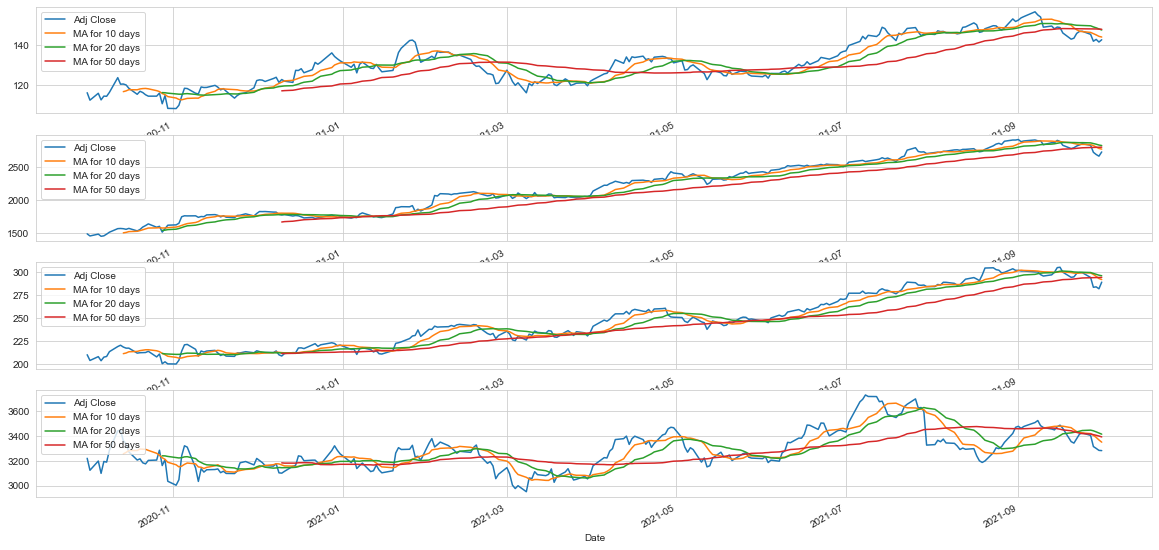

In [13]:
f,(axis1,axis2,axis3,axis4)=plt.subplots(4,1)
AAPL[['Adj Close','MA for 10 days','MA for 20 days','MA for 50 days']].plot(subplots=False,figsize=(20,10),ax=axis1,label='Apple')
GOOG[['Adj Close','MA for 10 days','MA for 20 days','MA for 50 days']].plot(subplots=False,figsize=(20,10),ax=axis2,label='Google')
MSFT[['Adj Close','MA for 10 days','MA for 20 days','MA for 50 days']].plot(subplots=False,figsize=(20,10),ax=axis3,label='Microsoft')
AMZN[['Adj Close','MA for 10 days','MA for 20 days','MA for 50 days']].plot(subplots=False,figsize=(20,10),ax=axis4,label='Amazon')


For Microsoft and Google, the moving average is angled up, so the stock prick is moving and the stocks are looking good for the long run. while, For Apple and Amazon, the moving average fluctuates, which means it's in range. and long term investement in the stock will be uncertain

to be noted that, Moving Average is not guaranteed to perfectly predict the future, but it just simplifies price data by smoothing it out and creating one flowing line.

# Daily Return Analysis

to analyze the risk of the stock, it's important to calculate the daily changes of the stock, and not just its absolute value. Retrieving teh daily returns for the Apple stock:

Text(0, 0.5, 'Daily Return')

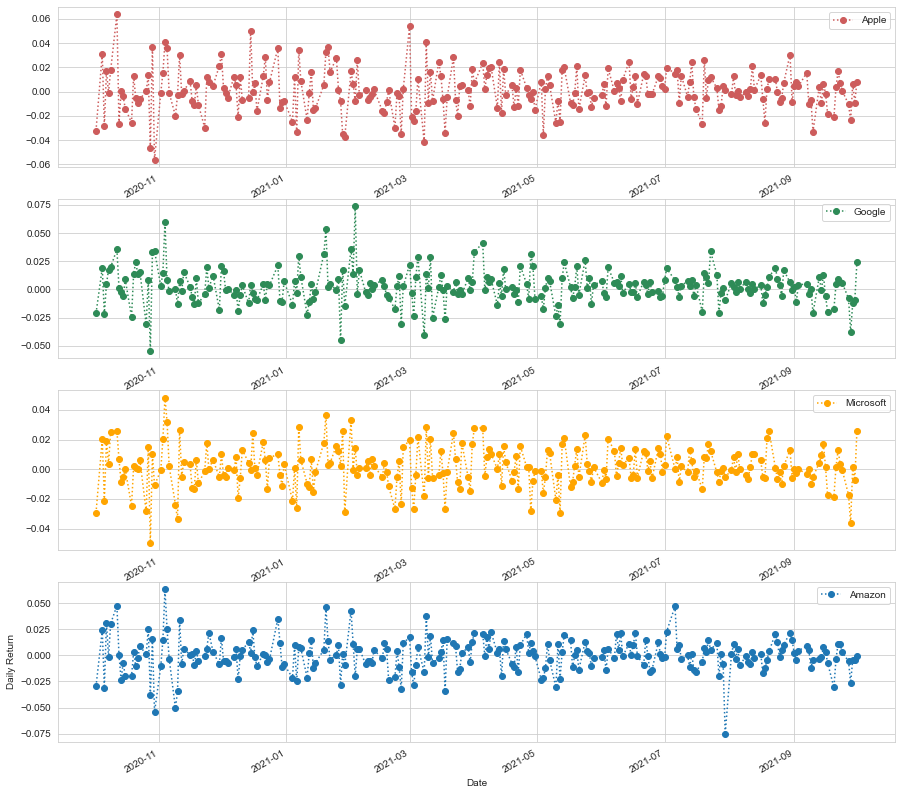

In [21]:
AAPL['Daily Return'] = AAPL['Adj Close'].pct_change()
GOOG['Daily Return'] = GOOG['Adj Close'].pct_change()
MSFT['Daily Return'] = MSFT['Adj Close'].pct_change()
AMZN['Daily Return'] = AMZN['Adj Close'].pct_change()
f,(axis1,axis2,axis3,axis4)=plt.subplots(4,1)
AAPL['Daily Return'].plot(figsize=(15,15),legend=True,linestyle=':',marker='o',ax=axis1,label='Apple',color='indianred')
GOOG['Daily Return'].plot(figsize=(15,15),legend=True,linestyle=':',marker='o',ax=axis2,label='Google',color='seagreen')
MSFT['Daily Return'].plot(figsize=(15,15),legend=True,linestyle=':',marker='o',ax=axis3,label='Microsoft',color='orange')
AMZN['Daily Return'].plot(figsize=(15,15),legend=True,linestyle=':',marker='o',ax=axis4,label='Amazon')
plt.ylabel('Daily Return')

For Apple, the highest return percentage was in 2020 October, meaning anyone who bought stocks that day had an 6% return of the stock.
For Google, the highest return percentage was in 2021 February, meaning anyone who bought stocks that day had an 7.5% return of the stock.
For Microsoft, the highest return percentage was in 2020 December, meaning anyone who bought stocks that day had an 4% return of the stock.
For Amazon, the highest return percentage was in 2020 November, meaning anyone who bought stocks that day had an greater than 5% return of the stock.

Average Daily Return:

Checking the histogram for the above stocks to get some rough idea about their distribution


<AxesSubplot:xlabel='Daily Return', ylabel='Count'>

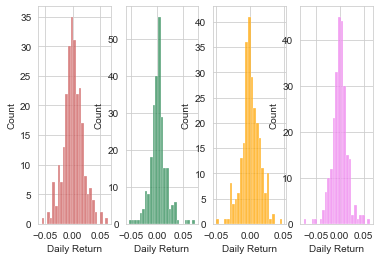

In [35]:
f,(axis1,axis2,axis3,axis4)=plt.subplots(1,4)
sns.histplot(AAPL['Daily Return'].dropna(),bins=25,color='indianred',ax=axis1,label='Apple')
sns.histplot(GOOG['Daily Return'].dropna(),bins=25,color='seagreen',ax=axis2,label='Google')
sns.histplot(MSFT['Daily Return'].dropna(),bins=25,color='orange',ax=axis3,label='Microsoft')
sns.histplot(AMZN['Daily Return'].dropna(),bins=25,color='violet',ax=axis4,label='Amazon')

here the Apple and Google has almost normal distribution whereas Microsoft and Amazon are skewed to the right.

To analyze the returns of all the stocks on our list, it's ideal to build a new data frame with all of

the adjusted close columns for each of those stock's data frames.

In [36]:
# Grabing all the closing prices for the tech stock list into one DataFrame
closing_df=pdr.get_data_yahoo(tech_list,start_date)['Adj Close']
closing_df

Symbols,AAPL,GOOG,MSFT,AMZN
Date,,,,
2020-10-01,116.043625,1490.089966,210.528198,3221.260010
2020-10-02,112.297722,1458.420044,204.315201,3125.000000
2020-10-05,115.755486,1486.020020,208.467102,3199.199951
2020-10-06,112.436829,1453.439941,204.037750,3099.959961
2020-10-07,114.344559,1460.290039,207.922104,3195.689941
...,...,...,...,...
2021-09-27,145.369995,2830.020020,294.170013,3405.800049
2021-09-28,141.910004,2723.679932,283.519989,3315.959961
2021-09-29,142.830002,2690.419922,284.000000,3301.120117


Daily returns for all the stocks:

In [37]:
#daily returns for all stocks
tech_rets=closing_df.pct_change()
tech_rets.head()

Symbols,AAPL,GOOG,MSFT,AMZN
Date,,,,
2020-10-01,NaN,NaN,NaN,NaN
2020-10-02,-0.032280,-0.021254,-0.029511,-0.029883
2020-10-05,0.030791,0.018925,0.020321,0.023744
2020-10-06,-0.028670,-0.021924,-0.021247,-0.031020
2020-10-07,0.016967,0.004713,0.019037,0.030881


Now, let's see if Google,and, Apple stocks have correlation to each other or not

0.5491890416912939

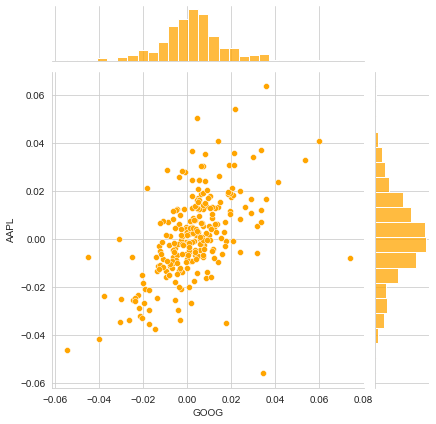

In [39]:
sns.jointplot(x='GOOG',y='AAPL',data=tech_rets,kind='scatter', color='orange')
pearson_for_GoogleandApple=tech_rets['GOOG'].corr(tech_rets['AAPL'])
pearson_for_GoogleandApple

Here, the Pearson Values are between 0.5 to 0.7. Correlation coefficients whose magnitude are between 0.5 and 0.7 indicate variables which can be considered moderately correlated.

Now, let's use all the data's in the Tech_rets dataframe to obtain a rough idea about which stock return is correlated and which are not:

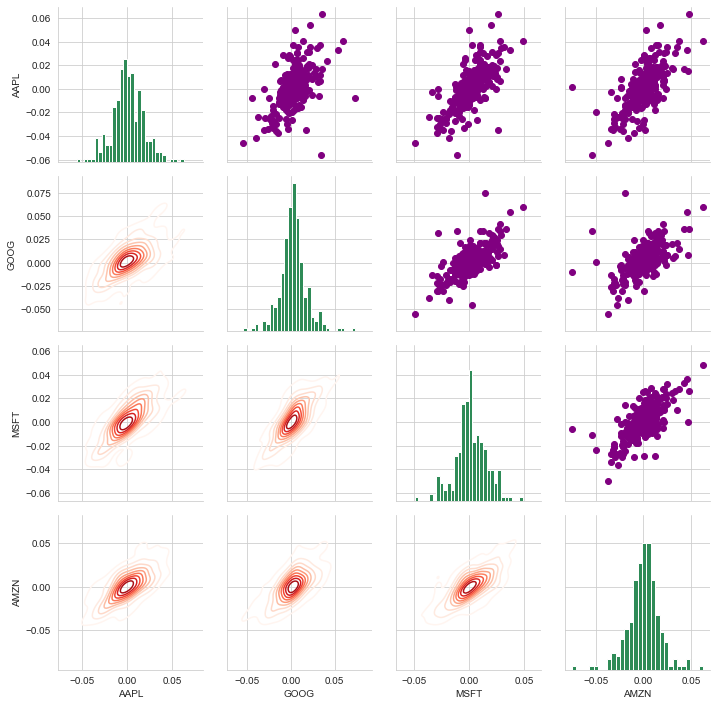

In [40]:
return_figs=sns.PairGrid(tech_rets.dropna())
return_figs.map_upper(plt.scatter,color='purple')
return_figs.map_lower(sns.kdeplot,cmap="Reds")
return_figs.map_diag(plt.hist,bins=30,color='seagreen')

at a quick glance, its shown an interesting correlation between Google and

Amazon, and Apple and Amazon it might be interesting to investigate that individual comparison.

Now, Analyzing the data with closing prices instead daily returns we get:

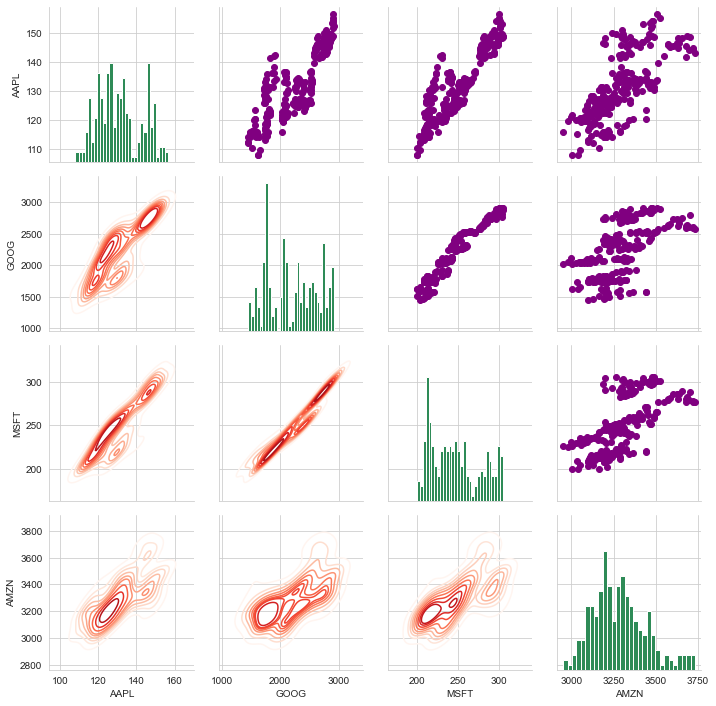

In [41]:
return_figs=sns.PairGrid(closing_df.dropna())
return_figs.map_upper(plt.scatter,color='purple',marker='o')
return_figs.map_lower(sns.kdeplot,cmap="Reds")
return_figs.map_diag(plt.hist,bins=30,color='seagreen')

here we have your histograms,kdeplots, and scatterplots  of the closing prices for each of the stocks.

Looking at them correlating,  apple and Amazon  stocks as they're closely scattered.
So, they might moderately influence the price of each other's stock

Checking the correlation between individual stocks:


<AxesSubplot:xlabel='Symbols', ylabel='Symbols'>

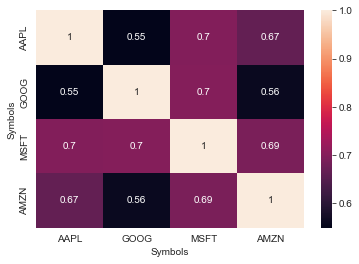

In [42]:
## for daily returns
corr=tech_rets.dropna().corr()

sns.heatmap(corr,annot=True)

<AxesSubplot:xlabel='Symbols', ylabel='Symbols'>

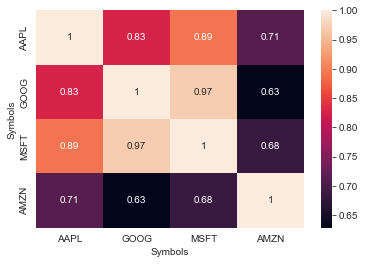

In [43]:
## for closing dataframe
corr=closing_df.dropna().corr()

sns.heatmap(corr,annot=True)

As we can see, the highest pearson value is for Apple and Microsoft Stock (0.71)and that has been already predicted from the pervious graph.ALso looking at the correlation data for the closing dataframe, we can conclude the same thing, also Google and Amazon are least correlated of the bunch

Which also makes sense, since they're all technology companies and are supposed to influence each other stock.



# Risk Analysis

There are many ways to quantify risk, one of the most basic ways is to use the information we've gathered on daily percentage returns is by comparing the expected return with the standard deviation of the daily returns.

In [44]:
#dropping null values from returns
rets=tech_rets.dropna()

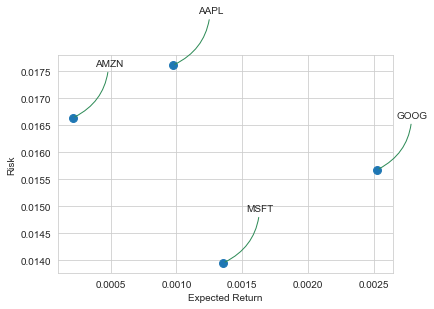

In [45]:
## to define the area of these circles for the scatter plot
area=np.pi*20
plt.scatter(rets.mean(),rets.std(),s=area)
plt.xlabel('Expected Return')
plt.ylabel('Risk')
for label, x, y in zip(rets.columns, rets.mean(), rets.std()):
    plt.annotate(
    label,
    xy=(x,y), xytext=(50,50),
    textcoords='offset points', ha='right', va='bottom',
    arrowprops = dict(arrowstyle = '-', connectionstyle = 'arc3,rad=-0.3',color='seagreen'))


To pick the best stock out of the 4, we have to perform risk analysis. The stock with higher return and lower risk will be the best stock to pick from. Here, Google looks the best with a bit of a risk, and Apple Stocks looks very Risky,while Amazon has high risk and less return and Microsoft gives a very small risk with a moderate Return of the four stocks.

# Value At Risk

Here, will use 2 methods 'Bootstrap' and 'Monte Carlo' to calculate the value of the risks for the above stocks


Using Bootstrap Method:


For Apple:

In [47]:
##calculating the quarantile for 5%variance

tech_rets['AAPL'].dropna().quantile(0.05)

-0.02915242993745688

this means, 95% of the time Apple will endure a loss of 2.9% daily at most for a 100% return value. which means if Apple have 1M USD investment in 1 day, at worst they'll lose 29,000USD.

For Google:

In [48]:
##calculating the quarantile for 5%variance

tech_rets['GOOG'].dropna().quantile(0.05)

-0.022140526209422372

this means, 95% of the time Google will endure a loss of 2.2% daily at most  for a 100% return value. which means if Google have 1M USD investment in 1 day, at worst they'll lose 22,000USD.

For Microsoft:

In [49]:
tech_rets['MSFT'].dropna().quantile(0.05)

-0.024247962306715998

this means, 95% of the time Microsoft will endure a loss of 2.4% daily at most for a 100% return value. which means if Microsoft have 1M USD investment in 1 day, at worst they'll lose 24,000USD.

# Monte Carlo Method(for Google and Amazon Stocks):

Now, trying the Monte Carlo Method that uses the Wieners Process/GMB process

for Monte Carlo Method, first, have to run many trials with random marked conditions.

Then, calculate portfolio losses for each trial.

So, after a lot of these simulations, have to use an aggregation of all these simulations to establish how risky the stock is.

Value at Risk for Google by Monte Carlo Method:

In [50]:
##for Google
days=365
dt=1/days
mu=rets['GOOG'].mean()
sigma=rets['GOOG'].std()

In [51]:
def stock_monte_carlo(start_price,days,mu,sigma):
    price=np.zeros(days)
    price[0]=start_price
    shock=np.zeros(days)
    drift=np.zeros(days)
    for x in range(1,days):
        shock[x]=np.random.normal(loc=mu*dt,scale=sigma*np.sqrt(dt))
        drift[x]=mu*dt
        price[x]=price[x-1]+(price[x-1]*(shock[x]+drift[x]))
    return price

In [52]:
#checking the starting price for Google
GOOG.head()

,High,Low,Open,Close,Volume,Adj Close,MA for 10 days,MA for 20 days,MA for 50 days,Daily Return
Date,,,,,,,,,,
2020-10-01,1499.040039,1479.209961,1484.270020,1490.089966,1779500,1490.089966,NaN,NaN,NaN,NaN
2020-10-02,1483.199951,1450.920044,1462.030029,1458.420044,1284100,1458.420044,NaN,NaN,NaN,-0.021254
2020-10-05,1488.209961,1464.270020,1466.209961,1486.020020,1113300,1486.020020,NaN,NaN,NaN,0.018925
2020-10-06,1486.760010,1448.589966,1475.579956,1453.439941,1245400,1453.439941,NaN,NaN,NaN,-0.021924
2020-10-07,1468.959961,1436.000000,1464.290039,1460.290039,1746200,1460.290039,NaN,NaN,NaN,0.004713


Text(0.5, 1.0, 'Monte Carlo Analysis for Google')

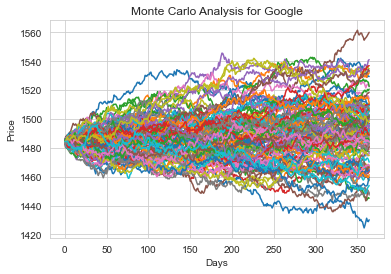

In [53]:
start_price = 1484.270020

for run in range(100):
    plt.plot(stock_monte_carlo(start_price,days,mu,sigma))
plt.xlabel("Days")
plt.ylabel("Price")  
plt.title('Monte Carlo Analysis for Google')

In [54]:
#running simulations of 1000
runs=10000
simulations=np.zeros(runs)
for run in range(runs):
    simulations[run]=stock_monte_carlo(start_price,days,mu,sigma)[days-1];

Drawing a histogram to calculate the starting and ending stock prices along with risk value with 1 percentile:

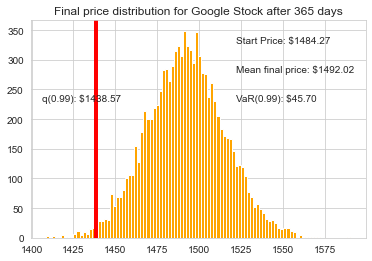

In [61]:
q=np.percentile(simulations,1)
plt.hist(simulations,bins=100,color='orange')
plt.figtext(0.6,0.8,s='Start Price: $%.2f' %start_price)
# Mean ending price
plt.figtext(0.6, 0.7, "Mean final price: $%.2f" % simulations.mean())

# Variance of the price (within 99% confidence interval)
plt.figtext(0.6, 0.6, "VaR(0.99): $%.2f" % (start_price - q))

# Display 1% quantile
plt.figtext(0.15, 0.6, "q(0.99): $%.2f" % q)

# Plot a line at the 1% quantile result
plt.axvline(x=q, linewidth=4, color='r')

# Title
plt.title(u"Final price distribution for Google Stock after %s days" % days);

From the above histogram, it seems that the start price and the year end price has a small difference(1492-1484) indicating a pretty stable stock market. According the amount of money to be lost at most(99%) of the time is 45.70 USD, so that's the value at risk. Which isn't so bad considering that your initialinvestment was 1438 USD, so it's a small risk(3.1%).




Value at Risk for AMAZON by Monte Carlo Method:

In [62]:
days=365
dt=1/days
mu=rets['AMZN'].mean()
sigma=rets['AMZN'].std()

In [64]:
#checking the starting price for Apple
AMZN.head()

,High,Low,Open,Close,Volume,Adj Close,MA for 10 days,MA for 20 days,MA for 50 days,Daily Return
Date,,,,,,,,,,
2020-10-01,3224.000000,3172.000000,3208.000000,3221.260010,4971900,3221.260010,NaN,NaN,NaN,NaN
2020-10-02,3195.800049,3123.000000,3153.629883,3125.000000,5613100,3125.000000,NaN,NaN,NaN,-0.029883
2020-10-05,3202.530029,3140.850098,3145.840088,3199.199951,3775300,3199.199951,NaN,NaN,NaN,0.023744
2020-10-06,3182.000000,3090.000000,3165.000000,3099.959961,5086900,3099.959961,NaN,NaN,NaN,-0.031020
2020-10-07,3200.000000,3132.389893,3135.000000,3195.689941,4309400,3195.689941,NaN,NaN,NaN,0.030881


Text(0.5, 1.0, 'Monte Carlo Analysis for Amazon')

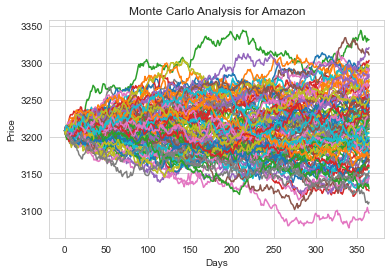

In [67]:
start_price =3208.00000

for run in range(100):
    plt.plot(stock_monte_carlo(start_price,days,mu,sigma))
plt.xlabel("Days")
plt.ylabel("Price")  
plt.title('Monte Carlo Analysis for Amazon')

In [68]:
#running simulations of 10000
runs=10000
simulations=np.zeros(runs)
for run in range(runs):
    simulations[run]=stock_monte_carlo(start_price,days,mu,sigma)[days-1];

drawing a histogram to calculate the starting and ending stock prices along with risk value with 1 percentile:

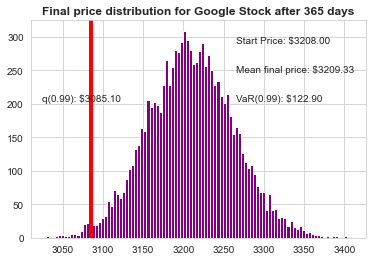

In [70]:
q=np.percentile(simulations,1)
plt.hist(simulations,bins=100,color='purple')
plt.figtext(0.6,0.8,s='Start Price: $%.2f' %start_price)
# Mean ending price
plt.figtext(0.6, 0.7, "Mean final price: $%.2f" % simulations.mean())

# Variance of the price (within 99% confidence interval)
plt.figtext(0.6, 0.6, "VaR(0.99): $%.2f" % (start_price - q,))

# Display 1% quantile
plt.figtext(0.15, 0.6, "q(0.99): $%.2f" % q)

# Plot a line at the 1% quantile result
plt.axvline(x=q, linewidth=4, color='r')

# Title
plt.title(u"Final price distribution for Google Stock after %s days" % days, weight='bold');

From the above histogram, it seems that the start price and the year end price has a small difference(3209-3208) indicating a pretty stable stock market. According the amount of money to be lost at most(99%) of the time is 122 USD, so that's our value at risk. considering that initial investment was 3208 USD, so it's a bit of a risk(3.8%).